In [1]:
import matplotlib.pyplot as plt
import networkx as nx
import numpy as np
import os
import pandas as pd
import random

In [2]:
n = 500
m = 50
G = nx.random_graphs.barabasi_albert_graph(n, 1)
pos = nx.spring_layout(G)

In [3]:
def plot_attributes(G):
    
    G_max_com = G.subgraph(max(nx.connected_components(G),key=len))
    print("-------------------------------------------------------------")
    # Average degree
    mean_degree = np.mean([degree for node, degree in G.degree()])
    print("Mean degree of nodes in the graph:", mean_degree)

    cluster = nx.average_clustering(G_max_com)
    print("Clustering:", cluster)

    # Average distance
    ave_len = nx.average_shortest_path_length(G_max_com)
    print("Average distance:", ave_len)

    # Diameter
    Diameter = nx.diameter(G_max_com)
    print("Diameter:", Diameter)

    # Nodes
    Nodes = len(G_max_com.nodes())
    print("Nodes:", Nodes)

    nx.draw_networkx_nodes(G, pos, node_size=15)
    nx.draw_networkx_edges(G, pos, alpha=0.5)
    plt.show()

In [4]:
def evolution(n, m):
    # Generate an empty graph containing m nodes (namely, m0 nodes at t=0 in the BA model)
    G=nx.empty_graph(m)  
    # Define m target nodes to be connected by the newly added edge
    targets=range(m)  
    # Add the existing nodes to an array according to the number of times proportional to their degree.
    # The degree of m nodes at initialization is all 0, so the array is empty.
    repeated_nodes=[]     
    # Add the remaining n-m nodes, the first node is numbered m (Python's array numbering starts from 0)
    source=m 
    # Do the loop to add nodes
    while source<n: 
        # add m edges from the source point to target points(target points are elected with consideration of degree)
        G.add_edges_from(zip([source]*m,targets)) 
        # increase the degree of target
        repeated_nodes.extend(targets)
        # increase the degree of source point(m times due to m edges)
        repeated_nodes.extend([source]*m) 
        # choose new target based on degree
        targets=set()
        while len(targets)<m:
            # Randomly select a node according to the probability proportional to the degree，
            # This step is the key, the random.choice method is to randomly select an element from an array。
            '''Because the number of occurrences of nodes in the repeated_nodes array is proportional to the node
             degree, this process can ensure that nodes are selected according to the probability of degree size,
             that is, degree-first connection is realized.'''
            x=random.choice(repeated_nodes) 
            # add the chosen point to target set
            targets.add(x)        
        # choose next source point until n points in the biggest connected subgraph
        source += 1 
        if source in [m+1, m+10, m+100, n-1]:
            plot_attributes(G)
    # return result graph G
    return G

-------------------------------------------------------------
Mean degree of nodes in the graph: 1.9607843137254901
Clustering: 0.0
Average distance: 1.9607843137254901
Diameter: 2
Nodes: 51


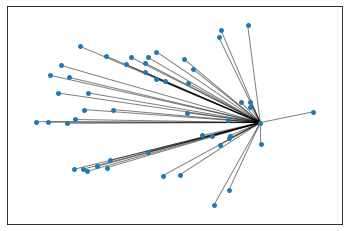

-------------------------------------------------------------
Mean degree of nodes in the graph: 16.666666666666668
Clustering: 0.8802410251409014
Average distance: 1.7175141242937852
Diameter: 2
Nodes: 60


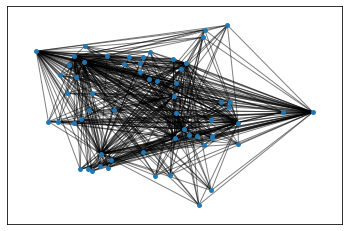

-------------------------------------------------------------
Mean degree of nodes in the graph: 66.66666666666667
Clustering: 0.5881683548648556
Average distance: 1.552572706935123
Diameter: 2
Nodes: 150


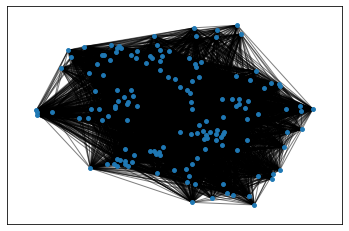

-------------------------------------------------------------
Mean degree of nodes in the graph: 89.97995991983969
Clustering: 0.27419919670288984
Average distance: 1.8193414942334467
Diameter: 3
Nodes: 499


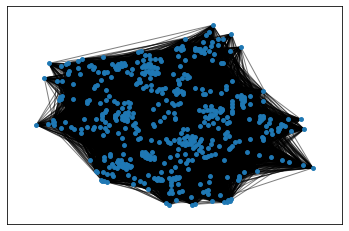

In [5]:
G_new = evolution(n, m)